## indicator model

To determine the impact each roster position has on team success, we need to examine the quality of players per game and the result of each game. For each roster position, there will be elite players and secondary players per team. Elite players will be assinged a value of 1 whereas secondary players, a value 2.

### import data sets  "play by play goal detail" and "game detail"

In [40]:
import sys
import os
import pandas as pd
import numpy as np
import datetime, time
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from pylab import hist, show
import scipy
import zipfile


pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 200)


In [41]:
pwd

'/Users/stefanostselios/Desktop/nhl_roster_design-master'

In [42]:
d0 = pd.read_csv('season_games.csv', index_col=0)
d1 = pd.read_csv('season_game_team_roster.csv', index_col=0)


In [43]:
d1.head()

,Season,GameNumber,TeamCode,RosterCount,D1,D2,F1,F2
0,2010,20001,MTL,18.0,1.0,5.0,2.0,10.0
1,2010,20001,TOR,18.0,1.0,5.0,2.0,10.0
2,2010,20002,PHI,18.0,2.0,4.0,5.0,7.0
3,2010,20002,PIT,18.0,3.0,3.0,5.0,7.0
4,2010,20003,CAR,18.0,1.0,5.0,3.0,9.0


In [44]:
d0 = d0[['Season', 'GameNumber', 'VTeamCode', 'HTeamCode', 'HGF', 'VGF', 'GD', 'WinTeam']]
d0.head()

,Season,GameNumber,VTeamCode,HTeamCode,HGF,VGF,GD,WinTeam
0,2010,20001,MTL,TOR,3,2,1,TOR
1,2010,20002,PHI,PIT,2,3,-1,PHI
2,2010,20003,CAR,MIN,3,4,-1,CAR
3,2010,20004,CHI,COL,4,3,1,COL
4,2010,20005,CGY,EDM,4,0,4,EDM


In [45]:
dm = d0.merge(d1, on=['Season', 'GameNumber'], how='left')

- Calculate the difference between player quality per game for all positions with respect to home team ( Home Team - Visitor Team). There are 5 positions and 2 types of player quality. This will give us a total of 10 differenecs. 

In [46]:
dm = dm[dm['GameNumber'] <= 21230]
dm.shape

(2245, 14)

In [47]:
dm['GD'] = dm.apply(lambda x: (x['HGF'] - x['VGF']) if x['HTeamCode']== x['TeamCode'] else (x['VGF'] - x['HGF']), 1)

In [48]:
dm['Win'] = dm.apply(lambda x: 1 if x['WinTeam']== x['TeamCode'] else 0, 1)

In [49]:
dm['GF'] = dm.apply(lambda x: x['HGF'] if x['HTeamCode']== x['TeamCode'] else x['VGF'], 1)
dm['GA'] = dm.apply(lambda x: x['HGF'] if x['HTeamCode']!= x['TeamCode'] else x['VGF'], 1)

In [50]:
dm.head()

,Season,GameNumber,VTeamCode,HTeamCode,HGF,VGF,GD,WinTeam,TeamCode,RosterCount,D1,D2,F1,F2,Win,GF,GA
0,2010,20001,MTL,TOR,3,2,-1,TOR,MTL,18.0,1.0,5.0,2.0,10.0,0,2,3
1,2010,20001,MTL,TOR,3,2,1,TOR,TOR,18.0,1.0,5.0,2.0,10.0,1,3,2
2,2010,20002,PHI,PIT,2,3,1,PHI,PHI,18.0,2.0,4.0,5.0,7.0,1,3,2
3,2010,20002,PHI,PIT,2,3,-1,PHI,PIT,18.0,3.0,3.0,5.0,7.0,0,2,3
4,2010,20003,CAR,MIN,3,4,1,CAR,CAR,18.0,1.0,5.0,3.0,9.0,1,4,3


In [51]:
#dm['x1'] = dm.apply(lambda x: 1 if x['F1']== 1 else 0, 1)
dm['x2'] = dm.apply(lambda x: 1 if x['F1']== 2 else 0, 1)
dm['x3'] = dm.apply(lambda x: 1 if x['F1']== 3 else 0, 1)
dm['x4'] = dm.apply(lambda x: 1 if x['F1']== 4 else 0, 1)
dm['x5'] = dm.apply(lambda x: 1 if x['F1']== 5 else 0, 1)
dm['x6'] = dm.apply(lambda x: 1 if x['F1']== 6 else 0, 1)
dm['x7'] = dm.apply(lambda x: 1 if x['F1']== 7 else 0, 1)
dm['x8'] = dm.apply(lambda x: 1 if x['F1']== 8 else 0, 1)
dm['x9'] = dm.apply(lambda x: 1 if x['F1']== 9 else 0, 1)
dm['x10'] = dm.apply(lambda x: 1 if x['F1']== 10 else 0, 1)
dm['x11'] = dm.apply(lambda x: 1 if x['F1']== 11 else 0, 1)
#dm['x12'] = dm.apply(lambda x: 1 if x['F1']== 12 else 0, 1)

In [52]:
#dm['z1'] = dm.apply(lambda x: 1 if x['D1']== 1 else 0, 1)
dm['z2'] = dm.apply(lambda x: 1 if x['D1']== 2 else 0, 1)
dm['z3'] = dm.apply(lambda x: 1 if x['D1']== 3 else 0, 1)
dm['z4'] = dm.apply(lambda x: 1 if x['D1']== 4 else 0, 1)
dm['z5'] = dm.apply(lambda x: 1 if x['D1']== 5 else 0, 1)
#dm['z6'] = dm.apply(lambda x: 1 if x['D1']== 6 else 0, 1)

In [53]:
dm.shape

(2245, 31)

In [54]:
dm.head()

,Season,GameNumber,VTeamCode,HTeamCode,HGF,VGF,GD,WinTeam,TeamCode,RosterCount,D1,D2,F1,F2,Win,GF,GA,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,z2,z3,z4,z5
0,2010,20001,MTL,TOR,3,2,-1,TOR,MTL,18.0,1.0,5.0,2.0,10.0,0,2,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2010,20001,MTL,TOR,3,2,1,TOR,TOR,18.0,1.0,5.0,2.0,10.0,1,3,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2010,20002,PHI,PIT,2,3,1,PHI,PHI,18.0,2.0,4.0,5.0,7.0,1,3,2,0,0,0,1,0,0,0,0,0,0,1,0,0,0
3,2010,20002,PHI,PIT,2,3,-1,PHI,PIT,18.0,3.0,3.0,5.0,7.0,0,2,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,2010,20003,CAR,MIN,3,4,1,CAR,CAR,18.0,1.0,5.0,3.0,9.0,1,4,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [55]:
dm['F'] = dm['F1'] + dm['F2']
dm['D'] = dm['D1'] + dm['D2']

In [56]:
dm['DF'] = dm['F1'] - dm['F2']
dm['DD'] = dm['D1'] - dm['D2']

In [57]:
dm['F'].value_counts()

12.0    2030
Name: F, dtype: int64

In [58]:
dm['D'].value_counts()

6.0    2030
Name: D, dtype: int64

In [59]:
dm = dm.groupby(['Season', 'GameNumber']).filter(lambda x: ((x['F'] == 12) & (x['D'] == 6)).all())

In [60]:
dm.shape

(2030, 35)

In [61]:
dm['F'].value_counts()

12.0    2030
Name: F, dtype: int64

In [62]:
dm['D'].value_counts()

6.0    2030
Name: D, dtype: int64

## Summary analysis

In [63]:
dm.describe()

,Season,GameNumber,HGF,VGF,GD,RosterCount,D1,D2,F1,F2,Win,GF,GA,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,z2,z3,z4,z5,F,D,DF,DD
count,2030.0,2030.000000,2030.000000,2030.000000,2030.000000,2030.0,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.000000,2030.0,2030.0,2030.0,2030.0,2030.0,2030.000000,2030.000000,2030.0,2030.0,2030.0,2030.0,2030.000000,2030.000000
mean,2010.0,20622.621675,2.941872,2.739901,0.000000,18.0,1.500493,4.499507,3.045813,8.954187,0.500000,2.840887,2.840887,0.180788,0.255665,0.160591,0.205911,0.025616,0.0,0.0,0.0,0.0,0.0,0.292611,0.189163,0.0,0.0,12.0,6.0,-5.908374,-2.999015
std,0.0,352.093955,1.716062,1.633597,2.446268,0.0,0.984728,0.984728,1.574617,1.574617,0.500123,1.678379,1.678379,0.384937,0.436342,0.367244,0.404466,0.158025,0.0,0.0,0.0,0.0,0.0,0.455073,0.391734,0.0,0.0,0.0,0.0,3.149234,1.969456
min,2010.0,20001.000000,0.000000,0.000000,-8.000000,18.0,0.000000,3.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,12.0,6.0,-12.000000,-6.000000
25%,2010.0,20319.250000,2.000000,2.000000,-2.000000,18.0,1.000000,4.000000,2.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,12.0,6.0,-8.000000,-4.000000
50%,2010.0,20628.000000,3.000000,3.000000,0.000000,18.0,1.000000,5.000000,3.000000,9.000000,0.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,12.0,6.0,-6.000000,-4.000000
75%,2010.0,20927.750000,4.000000,4.000000,2.000000,18.0,2.000000,5.000000,4.000000,10.000000,1.000000,4.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,12.0,6.0,-4.000000,-2.000000
max,2010.0,21230.000000,9.000000,10.000000,8.000000,18.0,3.000000,6.000000,6.000000,12.000000,1.000000,10.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,12.0,6.0,0.000000,0.000000


## Mean number of F1, F2, D1 D1 per team

* create a season-team dataframe
  
  ** number of wins/points/winning percentage

### estimate roster model 

- regress home win on the difference in number of home and visitor players by position and quality (predictor variables). Add a constant to the predictors and use OLS. The purpose is to deterimine the impact each roster positin has on home team success.

In [67]:
dm.Win.mean()

0.5

In [64]:
y = dm['Win']  
X = sm.add_constant(dm[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.474
Method:                 Least Squares   F-statistic:                     366.6
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          2.92e-280
Time:                        17:14:35   Log-Likelihood:                -1522.7
No. Observations:                2030   AIC:                             3055.
Df Residuals:                    2025   BIC:                             3083.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2             0.4360      0.027     16.283      0.000         0.383     0.488
x3             0.5106      0.023     22.678      0.000         0.466     0.555
x4             0.5521      0.028     19.436      0.000         0.496     0.608
x5             0.6100      0.025     24.316      0.000         0.561     0.659
x6             0.6538      0.071      9.192      0.000         0.514     0.793
x7                  0          0        nan        nan             0         0
x8                  0          0        nan        nan             0         0
x9                  0          0        nan        nan             0         0
x10                 0          0        nan        nan             0         0
x11                 0          0        nan        nan             0         0
==============================================================================
Omnibus:                        0.011   Durbin-Watson:                   2.803
Prob(Omnibus):                  0.995   Jarque-Bera (JB):              164.191
Skew:                           0.006   Prob(JB):                     2.22e-36
Kurtosis:                       1.607   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [65]:
result.params

x2     0.435967
x3     0.510597
x4     0.552147
x5     0.610048
x6     0.653846
x7     0.000000
x8     0.000000
x9     0.000000
x10    0.000000
x11    0.000000
dtype: float64

In [68]:
y = dm['Win']  
X = sm.add_constant(dm[['z2', 'z3', 'z4', 'z5']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    Win   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     452.3
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          3.65e-163
Time:                        17:14:35   Log-Likelihood:                -1802.5
No. Observations:                2030   AIC:                             3609.
Df Residuals:                    2028   BIC:                             3620.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
z2             0.5488      0.024     22.736      0.000         0.501     0.596
z3             0.5911      0.030     19.691      0.000         0.532     0.650
z4                  0          0        nan        nan             0         0
z5                  0          0        nan        nan             0         0
==============================================================================
Omnibus:                      747.651   Durbin-Watson:                   2.345
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.529
Skew:                          -0.002   Prob(JB):                     1.48e-22
Kurtosis:                       1.910   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [66]:
y = dm['GD']  
X = sm.add_constant(dm[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GD   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     8.636
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.13e-08
Time:                        17:14:35   Log-Likelihood:                -4674.5
No. Observations:                2030   AIC:                             9359.
Df Residuals:                    2025   BIC:                             9387.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2            -0.3896      0.126     -3.081      0.002        -0.638    -0.142
x3             0.0443      0.106      0.417      0.677        -0.164     0.253
x4             0.3190      0.134      2.377      0.018         0.056     0.582
x5             0.5072      0.119      4.280      0.000         0.275     0.740
x6             1.0385      0.336      3.091      0.002         0.380     1.697
x7                  0          0        nan        nan             0         0
x8                  0          0        nan        nan             0         0
x9                  0          0        nan        nan             0         0
x10                 0          0        nan        nan             0         0
x11                 0          0        nan        nan             0         0
==============================================================================
Omnibus:                        0.415   Durbin-Watson:                   3.040
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.482
Skew:                           0.007   Prob(JB):                        0.786
Kurtosis:                       2.926   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [69]:
y = dm['GD']
X = sm.add_constant(dm[['z2', 'z3', 'z4', 'z5']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GD   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     12.32
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.79e-06
Time:                        17:14:36   Log-Likelihood:                -4683.6
No. Observations:                2030   AIC:                             9371.
Df Residuals:                    2028   BIC:                             9383.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
z2             0.2744      0.100      2.750      0.006         0.079     0.470
z3             0.5130      0.124      4.133      0.000         0.270     0.756
z4                  0          0        nan        nan             0         0
z5                  0          0        nan        nan             0         0
==============================================================================
Omnibus:                        0.702   Durbin-Watson:                   3.046
Prob(Omnibus):                  0.704   Jarque-Bera (JB):                0.759
Skew:                           0.007   Prob(JB):                        0.684
Kurtosis:                       2.906   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [70]:
y = dm['GF']  
X = sm.add_constant(dm[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GF   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     729.2
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:14:36   Log-Likelihood:                -4258.5
No. Observations:                2030   AIC:                             8527.
Df Residuals:                    2025   BIC:                             8555.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2             2.7221      0.103     26.416      0.000         2.520     2.924
x3             2.8189      0.087     32.531      0.000         2.649     2.989
x4             2.9724      0.109     27.187      0.000         2.758     3.187
x5             3.0526      0.097     31.616      0.000         2.863     3.242
x6             3.3654      0.274     12.293      0.000         2.829     3.902
x7                  0          0        nan        nan             0         0
x8                  0          0        nan        nan             0         0
x9                  0          0        nan        nan             0         0
x10                 0          0        nan        nan             0         0
x11                 0          0        nan        nan             0         0
==============================================================================
Omnibus:                       56.381   Durbin-Watson:                   1.860
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.553
Skew:                           0.422   Prob(JB):                     7.10e-14
Kurtosis:                       3.063   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [71]:
y = dm['GA']  
X = sm.add_constant(dm[['x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GA   R-squared:                       0.581
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     561.0
Date:                Mon, 27 Nov 2017   Prob (F-statistic):               0.00
Time:                        17:14:36   Log-Likelihood:                -4421.4
No. Observations:                2030   AIC:                             8853.
Df Residuals:                    2025   BIC:                             8881.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x2             3.1117      0.112     27.869      0.000         2.893     3.331
x3             2.7746      0.094     29.551      0.000         2.590     2.959
x4             2.6534      0.118     22.397      0.000         2.421     2.886
x5             2.5455      0.105     24.330      0.000         2.340     2.751
x6             2.3269      0.297      7.845      0.000         1.745     2.909
x7                  0          0        nan        nan             0         0
x8                  0          0        nan        nan             0         0
x9                  0          0        nan        nan             0         0
x10                 0          0        nan        nan             0         0
x11                 0          0        nan        nan             0         0
==============================================================================
Omnibus:                       98.550   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.636
Skew:                           0.577   Prob(JB):                     3.48e-25
Kurtosis:                       3.001   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [72]:
y = dm['GF']  
X = sm.add_constant(dm[['z2', 'z3', 'z4', 'z5']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GF   R-squared:                       0.396
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     665.3
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          6.85e-223
Time:                        17:14:36   Log-Likelihood:                -4791.7
No. Observations:                2030   AIC:                             9587.
Df Residuals:                    2028   BIC:                             9599.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
z2             2.9630      0.105     28.152      0.000         2.757     3.169
z3             3.0365      0.131     23.197      0.000         2.780     3.293
z4                  0          0        nan        nan             0         0
z5                  0          0        nan        nan             0         0
==============================================================================
Omnibus:                        9.394   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                8.824
Skew:                           0.125   Prob(JB):                       0.0121
Kurtosis:                       2.795   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [73]:
y = dm['GA']  
X = sm.add_constant(dm[['z2', 'z3', 'z4', 'z5']] )
result = sm.OLS(y, X).fit()
result.summary()

/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1263: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:978: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:875: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1814: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     GA   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     444.9
Date:                Mon, 27 Nov 2017   Prob (F-statistic):          6.48e-161
Time:                        17:14:36   Log-Likelihood:                -4934.5
No. Observations:                2030   AIC:                             9873.
Df Residuals:                    2028   BIC:                             9884.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
z2             2.6886      0.113     23.809      0.000         2.467     2.910
z3             2.5234      0.140     17.968      0.000         2.248     2.799
z4                  0          0        nan        nan             0         0
z5                  0          0        nan        nan             0         0
==============================================================================
Omnibus:                       50.219   Durbin-Watson:                   1.464
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.716
Skew:                           0.239   Prob(JB):                     6.46e-09
Kurtosis:                       2.534   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

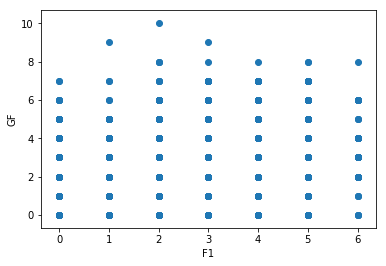

In [78]:
y = dm.GF
x = dm.F1
plt.scatter(x, y)
plt.show()

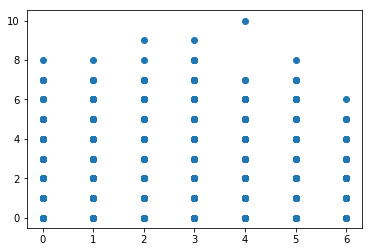

In [86]:
y = dm.GA
x = dm.F1
plt.scatter(x, y)
plt.show()

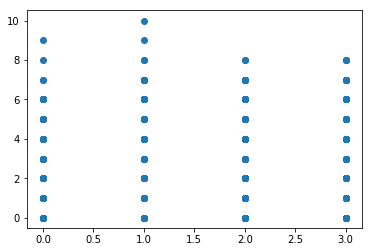

In [80]:
y = dm.GF
x = dm.D1
plt.scatter(x, y)
plt.show()

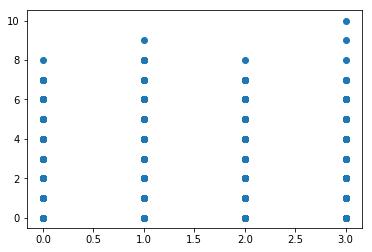

In [81]:
y = dm.GA
x = dm.D1
plt.scatter(x, y)
plt.show()